## [Exercise](https://www.learnpytorch.io/03_pytorch_computer_vision/#exercises)

[Continued...]

### 5. Load the [`torchvision.datasets.MNIST()`](https://pytorch.org/vision/stable/generated/torchvision.datasets.MNIST.html#torchvision.datasets.MNIST) train and test datasets.

In [1]:
import torch
import torchvision
from torch import nn
from torchvision import datasets, transforms
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt

print(torch.__version__)
print(torchvision.__version__)

2.1.0+cu121
0.16.0+cu121


In [2]:
train_data = datasets.MNIST(root = "data",
                            train = True,
                            download = True,
                            transform = torchvision.transforms.ToTensor(),
                            target_transform = None)

test_data = datasets.MNIST(root = "data",
                           train = False,
                           download = True,
                           transform = torchvision.transforms.ToTensor(),
                           target_transform = None)

100%|██████████| 9912422/9912422 [00:00<00:00, 95624049.80it/s]


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 56684929.26it/s]


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 143052878.20it/s]

Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw


100%|██████████| 4542/4542 [00:00<00:00, 20528587.03it/s]


Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



In [3]:
len(train_data), len(test_data)

(60000, 10000)

In [4]:
# See first training sample
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [5]:
class_name = train_data.classes
class_name, len(class_name)

(['0 - zero',
  '1 - one',
  '2 - two',
  '3 - three',
  '4 - four',
  '5 - five',
  '6 - six',
  '7 - seven',
  '8 - eight',
  '9 - nine'],
 10)

In [6]:
# Mapping classes to dictionary indices
class_to_idx = train_data.class_to_idx
class_to_idx

{'0 - zero': 0,
 '1 - one': 1,
 '2 - two': 2,
 '3 - three': 3,
 '4 - four': 4,
 '5 - five': 5,
 '6 - six': 6,
 '7 - seven': 7,
 '8 - eight': 8,
 '9 - nine': 9}

In [7]:
print(f'Image Shape: {image.shape}, label class_name and output shape: {class_name[label], label}')

Image Shape: torch.Size([1, 28, 28]), label class_name and output shape: ('5 - five', 5)


### 6. Visualize at least 5 different samples of the MNIST training dataset.

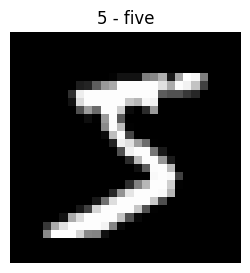

In [8]:
plt.figure(figsize = (3, 3))
plt.imshow(image.squeeze(), cmap = "gray")
plt.title(class_name[label])
plt.axis(False);

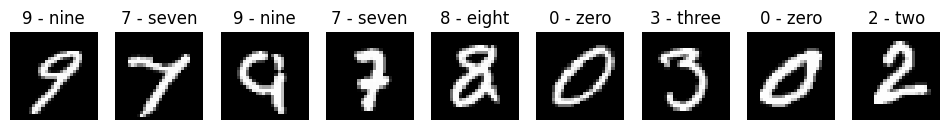

In [9]:
# PLotting more images
fig = plt.figure(figsize = (12, 5))
rows, cols = 1, 9

for i in range(1, rows*cols + 1):
  random_idx = torch.randint(0, len(train_data), size = [1]).item()
  image, label = train_data[random_idx]
  fig.add_subplot(rows, cols, i)
  plt.imshow(image.squeeze(), cmap = "gray")    # cmap="gray" to generate image on grayscale
  plt.title(class_name[label])
  plt.axis(False);

### 7. Turn the MNIST train and test datasets into dataloaders using `torch.utils.data.DataLoader`, set the `batch_size=32`.

In [10]:
from torch.utils.data import DataLoader

BATCH_SIZE = 32

train_dataloader = DataLoader(dataset = train_data,
                              batch_size = BATCH_SIZE,
                              shuffle = True)

test_dataloader = DataLoader(dataset = test_data,
                             batch_size = BATCH_SIZE,
                             shuffle = False)

len(train_dataloader), len(test_dataloader)

(1875, 313)

### 8. Recreate `model_2` used in the  [00_PyTorch_Computer_Vision.ipynb](https://github.com/LuluW8071/Data-Science/blob/main/Pytorch/03_PyTorch_Computer_Vision/00_PyTorch_Computer_Vision.ipynb) (the same model from the [CNN Explainer](https://poloclub.github.io/cnn-explainer/) website, also known as TinyVGG) capable of fitting on the MNIST dataset.

In [11]:
class MNISTModel(nn.Module):
  def __init__(self, input_shape, hidden_units, output_shape):
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels = input_shape,
                  out_channels = hidden_units,
                  kernel_size = 3,
                  stride = 1,
                  padding = 1),
        nn.ReLU(),
        nn.Conv2d(hidden_units, hidden_units,
                  kernel_size = 3,
                  stride = 1,
                  padding = 1),
        nn.ReLU(),
        nn.MaxPool2d(2)
    )
    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(hidden_units, hidden_units,
                  kernel_size = 3,
                  stride = 1,
                  padding = 1),
        nn.ReLU(),
        nn.Conv2d(hidden_units, hidden_units,
                  kernel_size = 3,
                  stride = 1,
                  padding = 1),
        nn.ReLU(),
        nn.MaxPool2d(2)
    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(hidden_units *7*7,
                  output_shape)
    )

  def forward(self, x):
    x = self.conv_block_1(x)
    x = self.conv_block_2(x)
    x = self.classifier(x)
    return x

In [12]:
torch.manual_seed(42)

# Setting device cpu at first
device = "cpu"
model = MNISTModel(1, 10, len(class_name)).to(device)
model, next(model.parameters()).device

(MNISTModel(
   (conv_block_1): Sequential(
     (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
     (1): ReLU()
     (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
     (3): ReLU()
     (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
   )
   (conv_block_2): Sequential(
     (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
     (1): ReLU()
     (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
     (3): ReLU()
     (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
   )
   (classifier): Sequential(
     (0): Flatten(start_dim=1, end_dim=-1)
     (1): Linear(in_features=490, out_features=10, bias=True)
   )
 ),
 device(type='cpu'))

### 9. Train the model on CPU and GPU and see how long it takes on each.

In [13]:
!pip install torchmetrics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 840.2/840.2 kB 4.5 MB/s eta 0:00:00


In [27]:
from torchmetrics import Accuracy

torchmetrics_accuracy = Accuracy(task = 'multiclass',
                                 num_classes = len(class_name)).to(device)

In [20]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params = model.parameters(), lr = 0.01)

In [21]:
# Train and Test function

def train(model, data_loader, loss_fn, optimizer, torchmetrics_accuracy, device):
  train_loss, train_acc = 0, 0
  model.to(device)
  for batch, (X, y) in enumerate(data_loader):
    X, y = X.to(device), y.to(device)
    y_pred = model(X)
    loss = loss_fn(y_pred, y)
    train_loss += loss
    train_acc += torchmetrics_accuracy(y,
                                       y_pred.argmax(dim = 1)) * 100
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  train_loss /= len(data_loader)
  train_acc /= len(data_loader)
  print(f"Train loss: {train_loss:.4f} --- Train acc: {train_acc:.2f}%")

def test(model, data_loader, loss_fn, optimizer, torchmetrics_accuracy, device):
  test_loss, test_acc = 0, 0
  model.to(device)
  model.eval()

  with torch.inference_mode():
    for X, y in data_loader:
      X, y = X.to(device), y.to(device)
      test_pred = model(X)
      test_loss += loss_fn(test_pred, y)
      test_acc += torchmetrics_accuracy(y,
                                        test_pred.argmax(dim = 1)) * 100

    test_loss /= len(data_loader)
    test_acc /= len(data_loader)
    print(f'Test loss: {test_loss:.4f} --- Test acc: {test_acc:.2f}%')

In [22]:
from timeit import default_timer as timer

# Timer function
def train_time(start, end, device):
  total_time = end - start
  print(f'Trained on {device}: {total_time:.3f} seconds')
  return total_time

In [23]:
torch.manual_seed(42)

from tqdm.auto import tqdm

train_time_start_cpu= timer()

# Train/test loop
epochs = 3

for epoch in tqdm(range(epochs)):
  print(f'Epoch: {epoch}')
  train(model, train_dataloader,
        loss_fn, optimizer,
        torchmetrics_accuracy,
        device)
  test(model, test_dataloader,
       loss_fn, optimizer,
       torchmetrics_accuracy,
       device)

train_time_end_cpu = timer()
total_train_time_model_cpu = train_time(train_time_start_cpu,
                                        train_time_end_cpu,
                                        device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
Train loss: 0.2879 --- Train acc: 90.35%
Test loss: 0.1256 --- Test acc: 96.06%
Epoch: 1
Train loss: 0.1203 --- Train acc: 96.30%
Test loss: 0.1033 --- Test acc: 96.77%
Epoch: 2
Train loss: 0.1115 --- Train acc: 96.56%
Test loss: 0.0958 --- Test acc: 96.94%
Trained on cpu: 120.344 seconds


In [35]:
# Evaluate Model and Prediction on CPU
torch.manual_seed(42)

def eval_model(model, data_loader, loss_fn,
               accuracy, device):
  loss, acc = 0, 0
  model.eval()
  with torch.inference_mode():
    for X, y in tqdm(data_loader):
      y_pred = model(X)
      loss += loss_fn(y_pred, y)
      acc += torchmetrics_accuracy(y,
                                   y_pred.argmax(dim = 1))

    loss /= len(data_loader)
    acc /= len(data_loader)

  return {"model_name": model.__class__.__name__,
          "model_loss": loss.item(),
          "model_acc": acc.item()}

In [36]:
# Evaluation of model on cpu
model_cpu_results = eval_model(model, test_dataloader, loss_fn,
                               torchmetrics_accuracy, device)

model_cpu_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'MNISTModel',
 'model_loss': 0.09580861777067184,
 'model_acc': 0.9694488644599915}

In [26]:
# Setting up device agnostic code
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

# Calling instance of model on GPU
model_gpu = MNISTModel(1, 10, len(class_name)).to(device)
model_gpu, next(model_gpu.parameters()).device

cuda


(MNISTModel(
   (conv_block_1): Sequential(
     (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
     (1): ReLU()
     (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
     (3): ReLU()
     (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
   )
   (conv_block_2): Sequential(
     (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
     (1): ReLU()
     (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
     (3): ReLU()
     (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
   )
   (classifier): Sequential(
     (0): Flatten(start_dim=1, end_dim=-1)
     (1): Linear(in_features=490, out_features=10, bias=True)
   )
 ),
 device(type='cuda', index=0))

In [28]:
from torchmetrics import Accuracy

accuracy = Accuracy(task = 'multiclass',
                    num_classes = len(class_name)).to(device)

In [31]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params = model_gpu.parameters(), lr = 0.01)

In [32]:
torch.manual_seed(42)

train_time_start_gpu= timer()

# Train/test loop on GPU
epochs = 3

for epoch in tqdm(range(epochs)):
  print(f'Epoch: {epoch}')
  train(model_gpu, train_dataloader,
        loss_fn, optimizer,
        accuracy,
        device)
  test(model_gpu, test_dataloader,
       loss_fn, optimizer,
       accuracy,
       device)

train_time_end_gpu = timer()
total_train_time_model_gpu = train_time(train_time_start_gpu,
                                        train_time_end_gpu,
                                        device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
Train loss: 0.1866 --- Train acc: 94.11%
Test loss: 0.1074 --- Test acc: 96.40%
Epoch: 1
Train loss: 0.1013 --- Train acc: 96.86%
Test loss: 0.0820 --- Test acc: 97.31%
Epoch: 2
Train loss: 0.0935 --- Train acc: 97.14%
Test loss: 0.0926 --- Test acc: 97.06%
Trained on cuda: 44.633 seconds


In [50]:
# Evaluate Model and Prediction on GPU
torch.manual_seed(42)
model_gpu_results = eval_model(model_gpu.to('cpu'), test_dataloader, loss_fn, accuracy, device)

model_gpu_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'MNISTModel',
 'model_loss': 0.09255851805210114,
 'model_acc': 0.9706469774246216}

In [63]:
# Comapring results of model trained on cpu and gpu
import pandas as pd

compare_results = pd.DataFrame([model_cpu_results, model_gpu_results])
compare_results['model_acc'] = compare_results['model_acc'] * 100
compare_results

,model_name,model_loss,model_acc
0,MNISTModel,0.095809,96.944886
1,MNISTModel,0.092559,97.064698


In [64]:

# Add training times to results comparison
compare_results["training_time"] = [total_train_time_model_cpu,
                                    total_train_time_model_gpu]
compare_results


,model_name,model_loss,model_acc,training_time
0,MNISTModel,0.095809,96.944886,120.343985
1,MNISTModel,0.092559,97.064698,44.633052


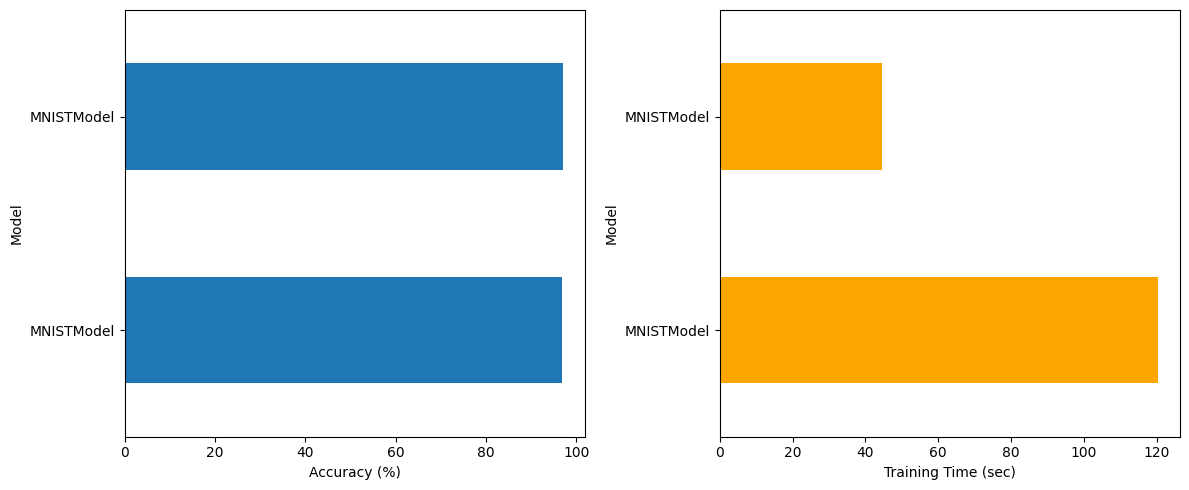

In [68]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
compare_results['model_acc'].plot(kind="barh", ax=axes[0])
axes[0].set_xlabel("Accuracy (%)")
axes[0].set_ylabel("Model")

compare_results['training_time'].plot(kind="barh", ax=axes[1], color='orange')
axes[1].set_xlabel("Training Time (sec)")
axes[1].set_ylabel("Model")
plt.tight_layout()

# Show the plot
plt.show()

### 10. Make predictions using your trained model and visualize at least 5 of them comparing the prediction to the target label.